<a href="https://colab.research.google.com/github/purvamarkam/ML_LAB/blob/main/Assignment5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Initial Training Accuracy: 0.9263
Initial Test Accuracy: 0.8975

After Outliers Added: Mean = 152.83, SD = 6.07
Training Accuracy (After Outliers): 0.9263
Test Accuracy (After Outliers): 0.8975
Training Accuracy (After Outlier Removal): 0.9358
Test Accuracy (After Outlier Removal): 0.9050


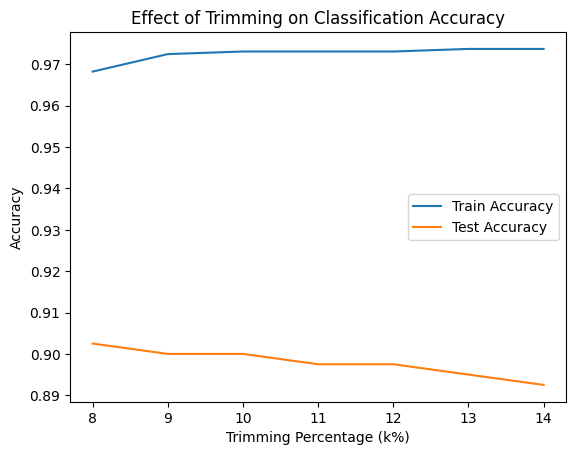

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm, zscore
from sklearn.model_selection import train_test_split
np.random.seed(47)
male_heights = np.random.normal(166, 5.5, 1000)
female_heights = np.random.normal(152, 4.5, 1000)

# Step 2: Train-Test Split
mh_train, mh_test = train_test_split(male_heights, test_size=200, random_state=42)
fh_train, fh_test = train_test_split(female_heights, test_size=200, random_state=42)

# Calculate mean & standard deviation for training data
mu_m, sigma_m = np.mean(mh_train), np.std(mh_train)
mu_f, sigma_f = np.mean(fh_train), np.std(fh_train)

# Probability-Based Classifier
def classify(height, mu_m, sigma_m, mu_f, sigma_f):
    p_male = norm.pdf(height, mu_m, sigma_m)
    p_female = norm.pdf(height, mu_f, sigma_f)
    return "male" if p_male > p_female else "female"

# Compute Accuracy
def accuracy(heights, true_gender, mu_m, sigma_m, mu_f, sigma_f):
    predictions = [classify(h, mu_m, sigma_m, mu_f, sigma_f) for h in heights]
    correct = sum(1 for prediction in predictions if prediction == true_gender)
    return correct / len(heights)

# Calculate Initial Accuracy
train_accuracy = (accuracy(mh_train, "male", mu_m, sigma_m, mu_f, sigma_f) +
                  accuracy(fh_train, "female", mu_m, sigma_m, mu_f, sigma_f)) / 2
test_accuracy = (accuracy(mh_test, "male", mu_m, sigma_m, mu_f, sigma_f) +
                 accuracy(fh_test, "female", mu_m, sigma_m, mu_f, sigma_f)) / 2

print(f"Initial Training Accuracy: {train_accuracy:.4f}")
print(f"Initial Test Accuracy: {test_accuracy:.4f}")

# Step 4.1: Modify Top 50 Female Heights
top_50_indices = np.argsort(fh_train)[-50:]
fh_train[top_50_indices] += 10

# Observe Change in Mean & SD
print(f"\nAfter Outliers Added: Mean = {np.mean(fh_train):.2f}, SD = {np.std(fh_train):.2f}")

# Recompute Accuracy after Modification
train_accuracy_after_outliers = (accuracy(mh_train, "male", mu_m, sigma_m, mu_f, sigma_f) +
                                 accuracy(fh_train, "female", mu_m, sigma_m, mu_f, sigma_f)) / 2
test_accuracy_after_outliers = (accuracy(mh_test, "male", mu_m, sigma_m, mu_f, sigma_f) +
                                accuracy(fh_test, "female", mu_m, sigma_m, mu_f, sigma_f)) / 2

print(f"Training Accuracy (After Outliers): {train_accuracy_after_outliers:.4f}")
print(f"Test Accuracy (After Outliers): {test_accuracy_after_outliers:.4f}")

# Step 4.2: Remove Outliers Using Z-Score
z_scores = zscore(fh_train)
fh_train_removed = fh_train[np.abs(z_scores) < 3]

# Recompute Accuracy after Outlier Removal
mu_f = np.mean(fh_train_removed)
sigma_f = np.std(fh_train_removed)

train_accuracy_after_removal = (accuracy(mh_train, "male", mu_m, sigma_m, mu_f, sigma_f) +
                                accuracy(fh_train_removed, "female", mu_m, sigma_m, mu_f, sigma_f)) / 2
test_accuracy_after_removal = (accuracy(mh_test, "male", mu_m, sigma_m, mu_f, sigma_f) +
                               accuracy(fh_test, "female", mu_m, sigma_m, mu_f, sigma_f)) / 2

print(f"Training Accuracy (After Outlier Removal): {train_accuracy_after_removal:.4f}")
print(f"Test Accuracy (After Outlier Removal): {test_accuracy_after_removal:.4f}")

k_values = range(8, 15)
train_accuracies = []
test_accuracies = []

for k in k_values:
    num_remove = int((k / 100) * len(fh_train))
    fh_train_trimmed = np.sort(fh_train)[num_remove:-num_remove]

    mu_f_trimmed, sigma_f_trimmed = np.mean(fh_train_trimmed), np.std(fh_train_trimmed)

    train_accuracy_trimmed = (accuracy(mh_train, "male", mu_m, sigma_m, mu_f_trimmed, sigma_f_trimmed) +
                              accuracy(fh_train_trimmed, "female", mu_m, sigma_m, mu_f_trimmed, sigma_f_trimmed)) / 2
    test_accuracy_trimmed = (accuracy(mh_test, "male", mu_m, sigma_m, mu_f_trimmed, sigma_f_trimmed) +
                             accuracy(fh_test, "female", mu_m, sigma_m, mu_f_trimmed, sigma_f_trimmed)) / 2

    train_accuracies.append(train_accuracy_trimmed)
    test_accuracies.append(test_accuracy_trimmed)

# Observing Accuracy Trends
plt.plot(k_values, train_accuracies, label="Train Accuracy")
plt.plot(k_values, test_accuracies, label="Test Accuracy")
plt.xlabel("Trimming Percentage (k%)")
plt.ylabel("Accuracy")
plt.legend()
plt.title("Effect of Trimming on Classification Accuracy")
plt.show()
